In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
cd 'drive/My Drive'

/content/drive/My Drive


In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

In [4]:
import warnings
from warnings import filterwarnings
filterwarnings("ignore")

In [5]:
df=pd.read_csv('kidney_disease.csv')

In [6]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [7]:
columns=pd.read_csv('data_description.txt',sep='-')
columns=columns.reset_index()
columns

,index,1. Features:
0,id,id
1,age,age
2,bp,blood pressure
3,sg,specific gravity
4,al,albumin
5,su,sugar
6,rbc,red blood cells
7,pc,pus cell
8,pcc,pus cell clumps
9,ba,bacteria


In [8]:
columns.columns=['cols','abb_col_names']
columns

,cols,abb_col_names
0,id,id
1,age,age
2,bp,blood pressure
3,sg,specific gravity
4,al,albumin
5,su,sugar
6,rbc,red blood cells
7,pc,pus cell
8,pcc,pus cell clumps
9,ba,bacteria


In [9]:
columns['abb_col_names'].values

array(['id', 'age', 'blood pressure', 'specific gravity', 'albumin',
       'sugar', 'red blood cells', ' pus cell', 'pus cell clumps',
       'bacteria', 'blood glucose random', 'blood urea',
       'serum creatinine', 'sodium', 'potassium', 'haemoglobin',
       'packed cell volume', 'white blood cell count',
       'red blood cell count', 'ypertension', 'diabetes mellitus',
       'coronary artery disease', 'appetite', 'pedal edema', 'anemia',
       'class'], dtype=object)

In [10]:
df.columns=columns['abb_col_names'].values
df.head()

,id,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,blood urea,serum creatinine,sodium,potassium,haemoglobin,packed cell volume,white blood cell count,red blood cell count,ypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [11]:
df.head()

,id,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,blood urea,serum creatinine,sodium,potassium,haemoglobin,packed cell volume,white blood cell count,red blood cell count,ypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       400 non-null    int64  
 1   age                      391 non-null    float64
 2   blood pressure           388 non-null    float64
 3   specific gravity         353 non-null    float64
 4   albumin                  354 non-null    float64
 5   sugar                    351 non-null    float64
 6   red blood cells          248 non-null    object 
 7    pus cell                335 non-null    object 
 8   pus cell clumps          396 non-null    object 
 9   bacteria                 396 non-null    object 
 10  blood glucose random     356 non-null    float64
 11  blood urea               381 non-null    float64
 12  serum creatinine         383 non-null    float64
 13  sodium                   313 non-null    float64
 14  potassium                3

In [13]:
def convert_dtypes(df,feature):
  df[feature]=pd.to_numeric(df[feature],errors='coerce')
# coerce will deal NaN values

In [14]:
features=['packed cell volume','white blood cell count','red blood cell count']
for feature in features:
  convert_dtypes(df,feature)

In [15]:
df.drop('id',axis=1,inplace=True)

In [16]:
df.head()

,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,blood urea,serum creatinine,sodium,potassium,haemoglobin,packed cell volume,white blood cell count,red blood cell count,ypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [17]:
def extract_cat_num(df):
  cat_col=[col for col in df.columns if df[col].dtype=='object']
  num_col=[col for col in df.columns if df[col].dtype!='object']
  return cat_col,num_col

In [18]:
cat_col,num_col=extract_cat_num(df)

In [19]:
cat_col

['red blood cells',
 ' pus cell',
 'pus cell clumps',
 'bacteria',
 'ypertension',
 'diabetes mellitus',
 'coronary artery disease',
 'appetite',
 'pedal edema',
 'anemia',
 'class']

In [20]:
num_col

['age',
 'blood pressure',
 'specific gravity',
 'albumin',
 'sugar',
 'blood glucose random',
 'blood urea',
 'serum creatinine',
 'sodium',
 'potassium',
 'haemoglobin',
 'packed cell volume',
 'white blood cell count',
 'red blood cell count']

In [21]:
for  col in cat_col:
  print('{} has {} values'.format(col,df[col].unique()))

red blood cells has [nan 'normal' 'abnormal'] values
 pus cell has ['normal' 'abnormal' nan] values
pus cell clumps has ['notpresent' 'present' nan] values
bacteria has ['notpresent' 'present' nan] values
ypertension has ['yes' 'no' nan] values
diabetes mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan] values
coronary artery disease has ['no' 'yes' '\tno' nan] values
appetite has ['good' 'poor' nan] values
pedal edema has ['no' 'yes' nan] values
anemia has ['no' 'yes' nan] values
class has ['ckd' 'ckd\t' 'notckd'] values


In [22]:
df['diabetes mellitus'].replace(to_replace={'\tno':'no','\tyes':'yes'},inplace=True)
df['coronary artery disease']=df['coronary artery disease'].replace(to_replace='\tno',value='no')
df['class']=df['class'].replace(to_replace='ckd\t',value='ckd')

In [23]:
for  col in cat_col:
  print('{} has {} values'.format(col,df[col].unique()))

red blood cells has [nan 'normal' 'abnormal'] values
 pus cell has ['normal' 'abnormal' nan] values
pus cell clumps has ['notpresent' 'present' nan] values
bacteria has ['notpresent' 'present' nan] values
ypertension has ['yes' 'no' nan] values
diabetes mellitus has ['yes' 'no' ' yes' nan] values
coronary artery disease has ['no' 'yes' nan] values
appetite has ['good' 'poor' nan] values
pedal edema has ['no' 'yes' nan] values
anemia has ['no' 'yes' nan] values
class has ['ckd' 'notckd'] values


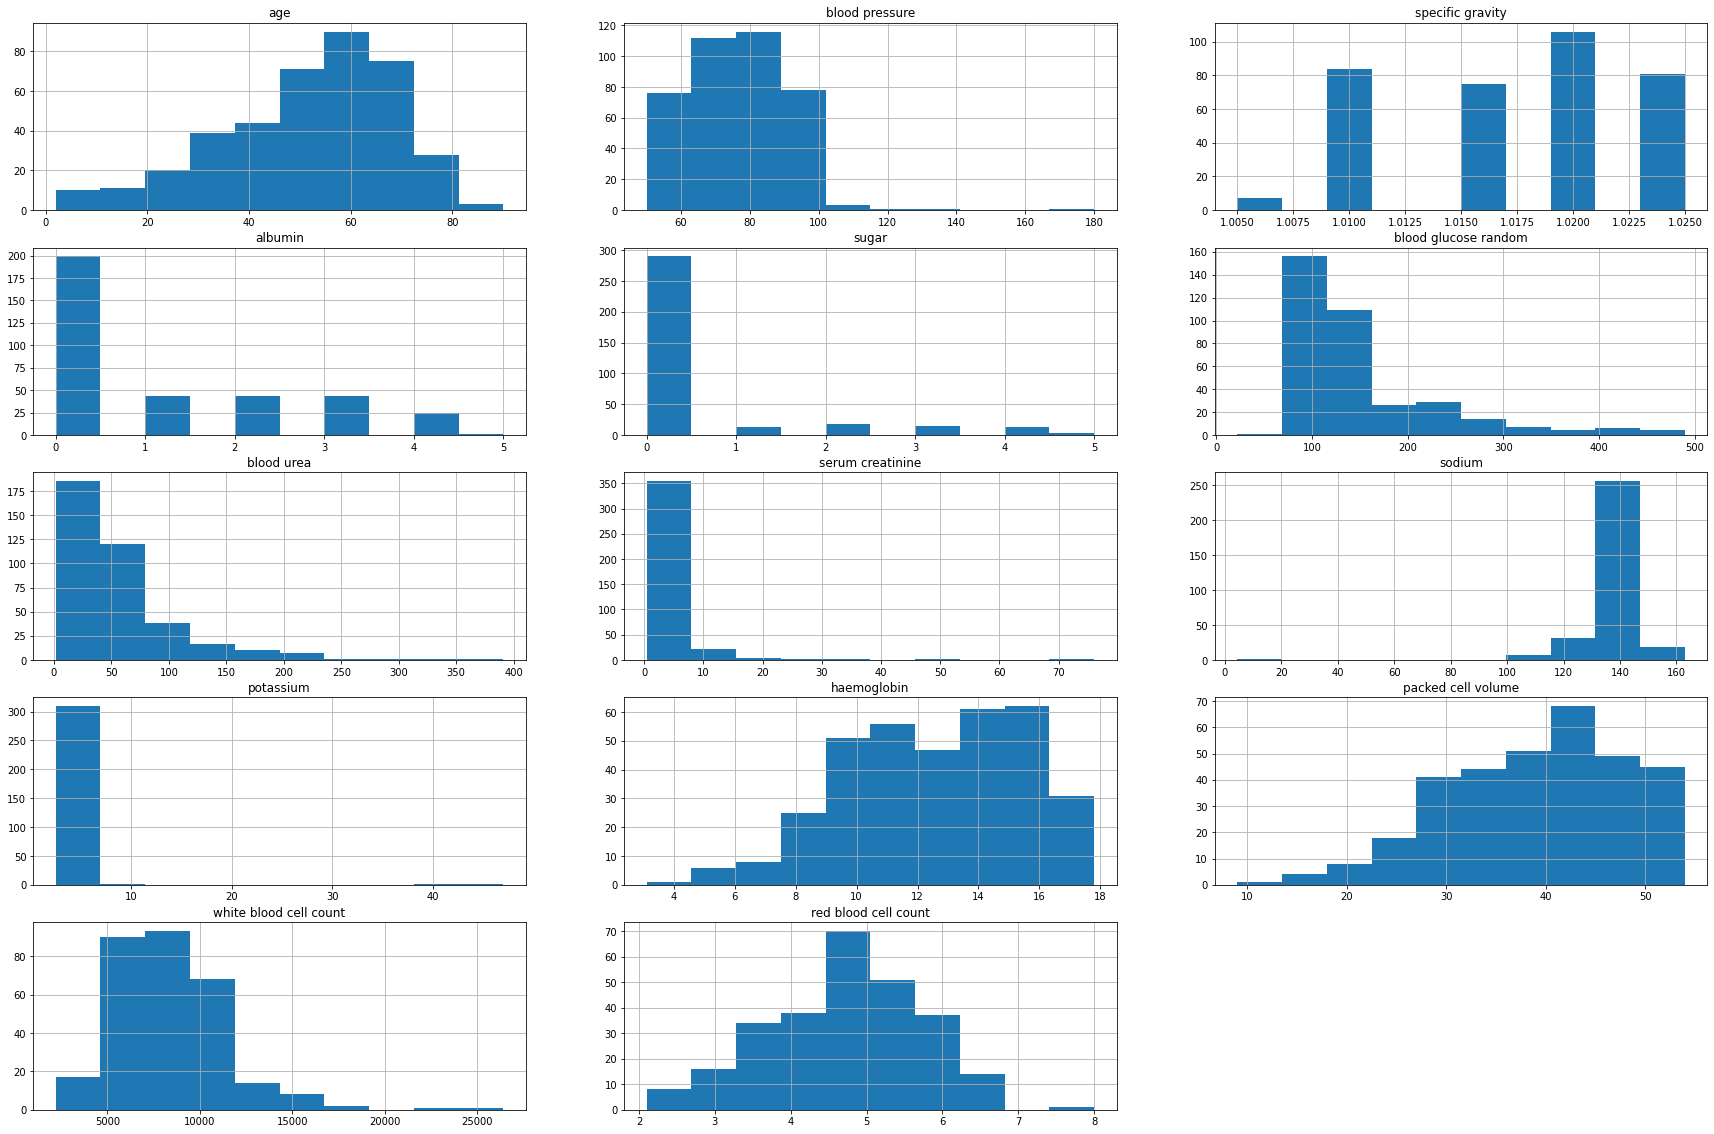

In [24]:
plt.figure(figsize=(30,20))

for i,feature in enumerate(num_col):
  plt.subplot(5,3,i+1)
  df[feature].hist()
  plt.title(feature)

In [25]:
## ckd,matched

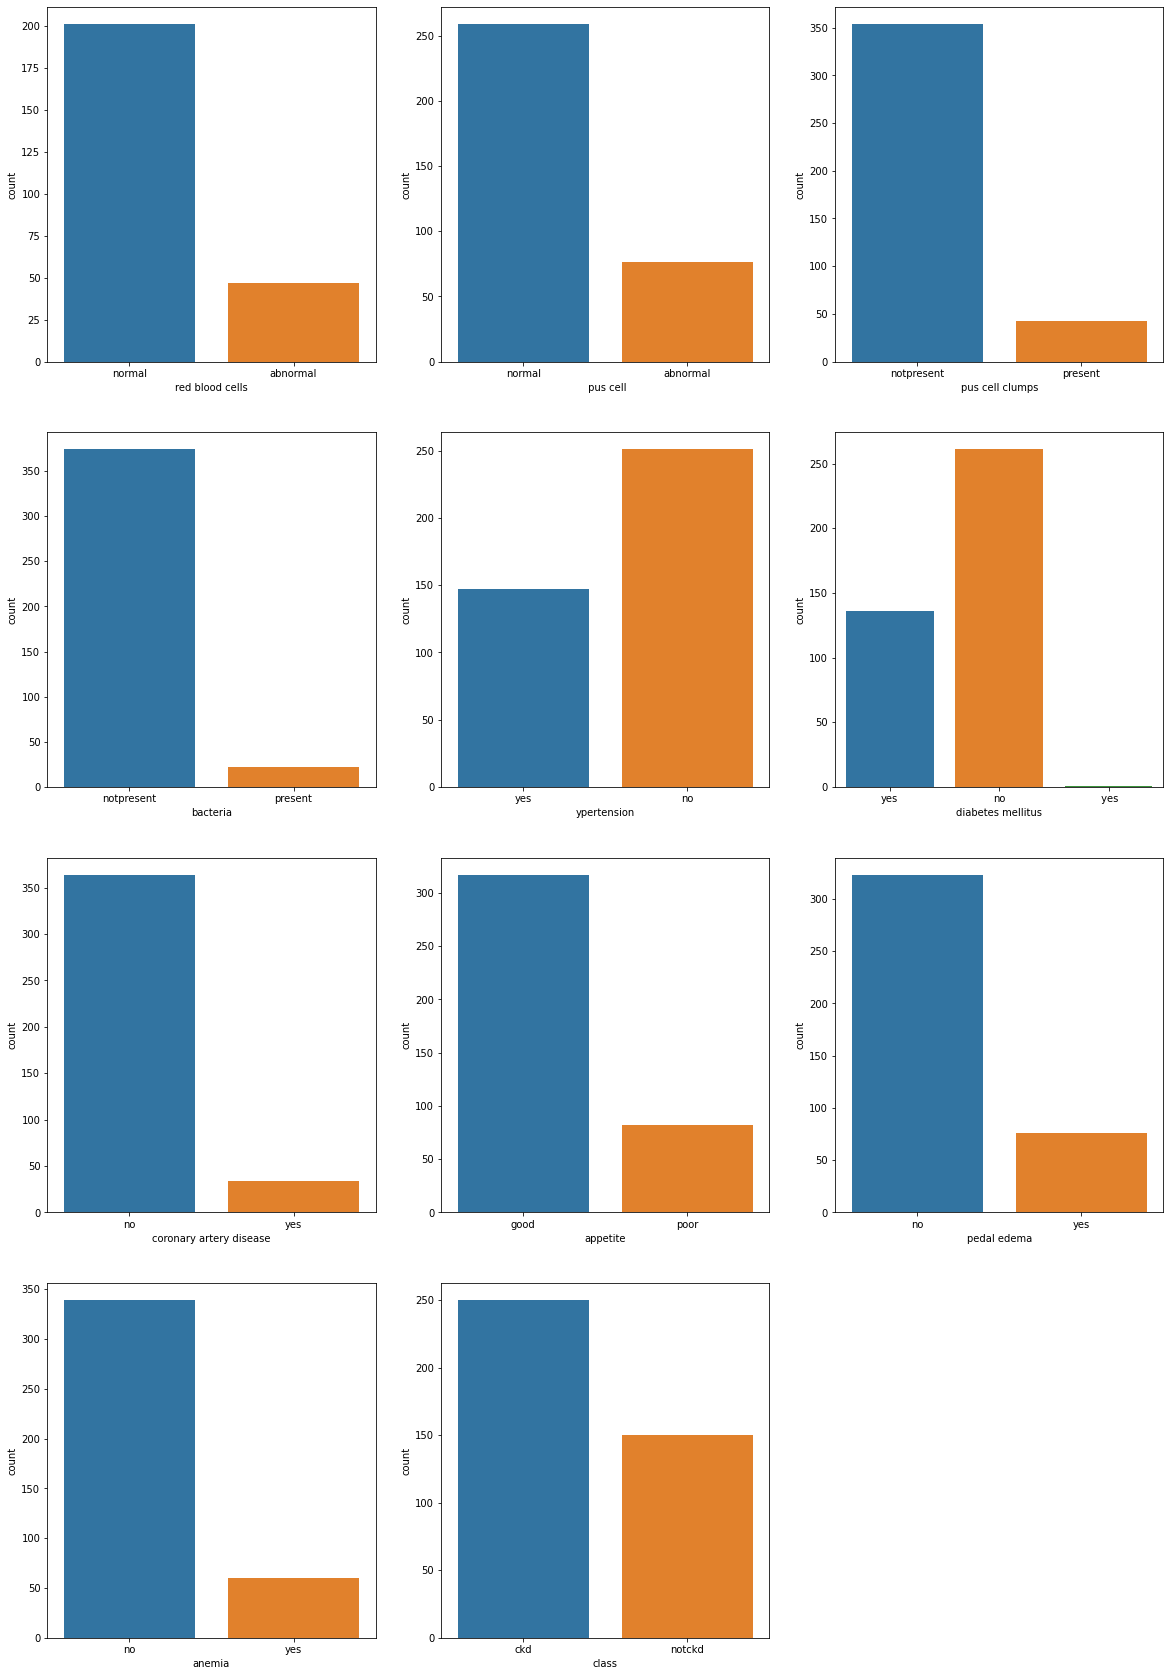

In [26]:
plt.figure(figsize=(20,30))
for i,feature in enumerate(cat_col):
  plt.subplot(4,3,i+1)
  sns.countplot(df[feature])

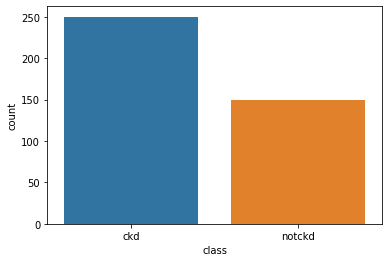

In [27]:
sns.countplot(df['class'])

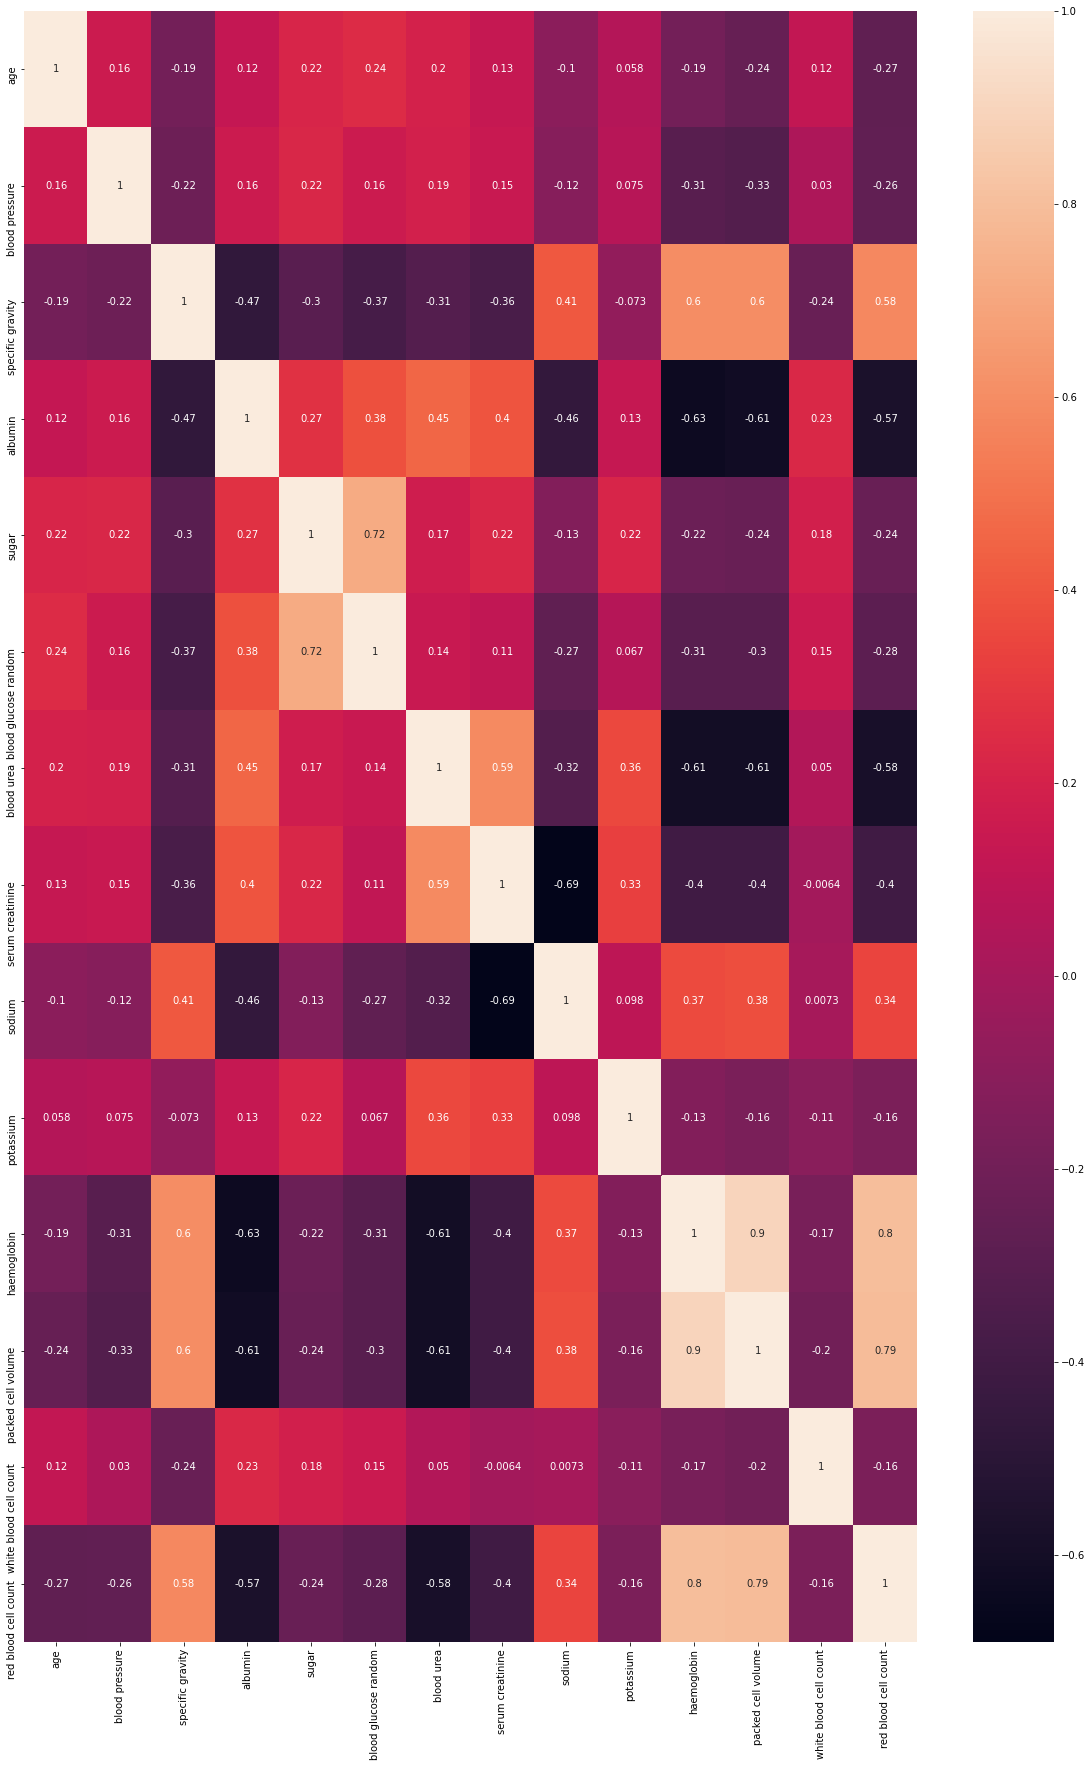

In [28]:
plt.figure(figsize=(20,30))
df.corr()
sns.heatmap(df.corr(),annot=True)

In [29]:
df.groupby(['red blood cells','class'])['red blood cell count'].agg(['count','mean','median','min','max'])

count      mean  median  min  max
red blood cells class                                    
abnormal        ckd        25  3.832000     3.7  2.5  5.6
normal          ckd        40  3.782500     3.8  2.1  8.0
                notckd    134  5.368657     5.3  4.4  6.5

In [30]:
!pip install plotly

In [31]:
import plotly.express as px

In [32]:
df.columns

Index(['age', 'blood pressure', 'specific gravity', 'albumin', 'sugar',
       'red blood cells', ' pus cell', 'pus cell clumps', 'bacteria',
       'blood glucose random', 'blood urea', 'serum creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed cell volume',
       'white blood cell count', 'red blood cell count', 'ypertension',
       'diabetes mellitus', 'coronary artery disease', 'appetite',
       'pedal edema', 'anemia', 'class'],
      dtype='object')

In [33]:
px.violin(df,y='red blood cell count',x='class',color='class')

In [34]:
px.scatter(df,x='haemoglobin',y='packed cell volume')

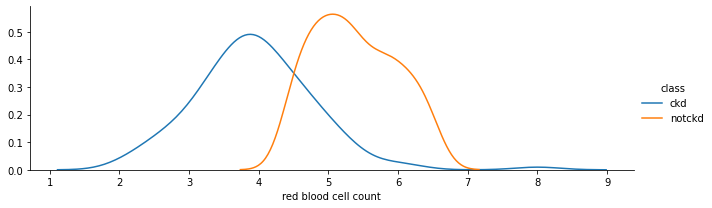

In [41]:
grid=sns.FacetGrid(df,hue='class',aspect=3)
grid.map(sns.kdeplot,'red blood cell count')
grid.add_legend()

In [57]:
def violin(col):
  fig=px.violin(df,y=col,x='class',color='class',box=True)
  return fig.show()

In [52]:
def scatters(col1,col2):
  fig=px.scatter(df,x=col1,y=col2,color='class')
  return fig.show()

In [45]:
def kde_plot(feature):
  grid=sns.FacetGrid(df,hue='class',aspect=3)
  grid.map(sns.kdeplot,feature)
  grid.add_legend()

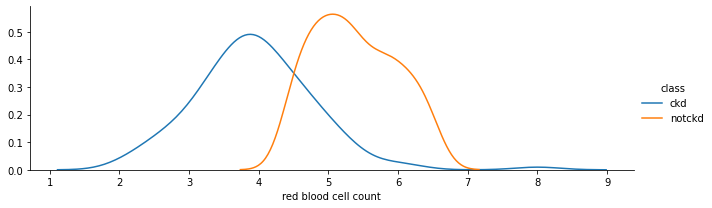

In [46]:
kde_plot('red blood cell count')

In [47]:
df.columns

Index(['age', 'blood pressure', 'specific gravity', 'albumin', 'sugar',
       'red blood cells', ' pus cell', 'pus cell clumps', 'bacteria',
       'blood glucose random', 'blood urea', 'serum creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed cell volume',
       'white blood cell count', 'red blood cell count', 'ypertension',
       'diabetes mellitus', 'coronary artery disease', 'appetite',
       'pedal edema', 'anemia', 'class'],
      dtype='object')

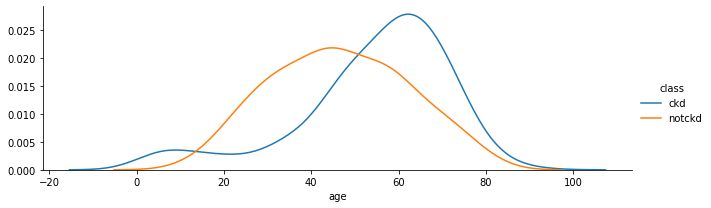

In [48]:
kde_plot('age')

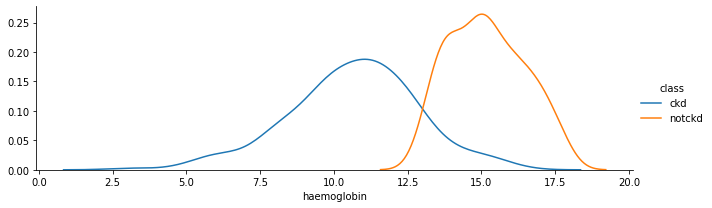

In [49]:
kde_plot('haemoglobin')

In [53]:
scatters('red blood cell count','packed cell volume')

In [54]:
scatters('red blood cell count','haemoglobin')

In [55]:
scatters('packed cell volume','haemoglobin')

In [58]:
violin('red blood cell count')

In [59]:
violin('packed cell volume')

In [60]:
scatters('red blood cell count','albumin')

In [62]:
df.isna().sum().sort_values(ascending=False)

red blood cells            152
red blood cell count       131
white blood cell count     106
potassium                   88
sodium                      87
packed cell volume          71
 pus cell                   65
haemoglobin                 52
sugar                       49
specific gravity            47
albumin                     46
blood glucose random        44
blood urea                  19
serum creatinine            17
blood pressure              12
age                          9
bacteria                     4
pus cell clumps              4
ypertension                  2
diabetes mellitus            2
coronary artery disease      2
anemia                       1
appetite                     1
pedal edema                  1
class                        0
dtype: int64

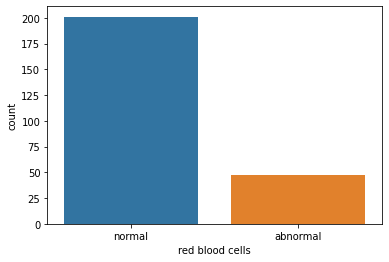

In [63]:
sns.countplot(df['red blood cells'])

In [64]:
data=df.copy()

In [65]:
data.head()

,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,blood urea,serum creatinine,sodium,potassium,haemoglobin,packed cell volume,white blood cell count,red blood cell count,ypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [67]:
data['red blood cells'].dropna().sample()

341    normal
Name: red blood cells, dtype: object

In [68]:
data['red blood cells'].isnull().sum()

152

In [70]:
random_sample=data['red blood cells'].dropna().sample(data['red blood cells'].isnull().sum())
random_sample

328      normal
66     abnormal
114    abnormal
325      normal
337      normal
         ...   
371      normal
29     abnormal
248    abnormal
284      normal
127      normal
Name: red blood cells, Length: 152, dtype: object

In [71]:
data[data['red blood cells'].isnull()].index

Int64Index([  0,   1,   5,   6,  10,  12,  13,  15,  16,  17,
            ...
            245, 268, 280, 290, 295, 309, 322, 349, 350, 381],
           dtype='int64', length=152)

In [72]:
random_sample.index

Int64Index([328,  66, 114, 325, 337, 171, 398, 358, 326, 315,
            ...
            232, 178, 378, 339, 107, 371,  29, 248, 284, 127],
           dtype='int64', length=152)

In [74]:
random_sample.index=data[data['red blood cells'].isnull()].index
random_sample.index

Int64Index([  0,   1,   5,   6,  10,  12,  13,  15,  16,  17,
            ...
            245, 268, 280, 290, 295, 309, 322, 349, 350, 381],
           dtype='int64', length=152)

In [75]:
random_sample

0        normal
1      abnormal
5      abnormal
6        normal
10       normal
         ...   
309      normal
322    abnormal
349    abnormal
350      normal
381      normal
Name: red blood cells, Length: 152, dtype: object

In [78]:
data.loc[data['red blood cells'].isnull(),'red blood cells']=random_sample

In [79]:
data.head()

,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,blood urea,serum creatinine,sodium,potassium,haemoglobin,packed cell volume,white blood cell count,red blood cell count,ypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,abnormal,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [80]:
data['red blood cells'].isnull().sum()

0

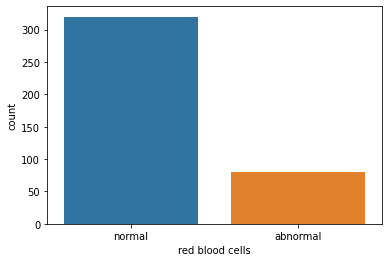

In [81]:
sns.countplot(data['red blood cells'])

In [82]:
def Random_value_imputation(feature):
  random_sample=data[feature].dropna().sample(data[feature].isnull().sum())
  random_sample.index=data[data[feature].isnull()].index
  data.loc[data[feature].isnull(),feature]=random_sample

In [83]:
data[num_col].isnull().sum()

age                         9
blood pressure             12
specific gravity           47
albumin                    46
sugar                      49
blood glucose random       44
blood urea                 19
serum creatinine           17
sodium                     87
potassium                  88
haemoglobin                52
packed cell volume         71
white blood cell count    106
red blood cell count      131
dtype: int64

In [ ]:
Random_value_imputation()

In [84]:
for col in num_col:
  Random_value_imputation(col)

In [85]:
data[num_col].isnull().sum()

age                       0
blood pressure            0
specific gravity          0
albumin                   0
sugar                     0
blood glucose random      0
blood urea                0
serum creatinine          0
sodium                    0
potassium                 0
haemoglobin               0
packed cell volume        0
white blood cell count    0
red blood cell count      0
dtype: int64

In [86]:
data[cat_col].isnull().sum()

red blood cells             0
 pus cell                  65
pus cell clumps             4
bacteria                    4
ypertension                 2
diabetes mellitus           2
coronary artery disease     2
appetite                    1
pedal edema                 1
anemia                      1
class                       0
dtype: int64

In [87]:
Random_value_imputation(' pus cell') 

In [89]:
data['pus cell clumps'].mode()[0]

'notpresent'

In [90]:
def impute_mode(feature):
  mode=data[feature].mode()[0]
  data[feature]=data[feature].fillna(mode)
  

In [91]:
for col in cat_col:
  impute_mode(col)


In [92]:
data[cat_col].isnull().sum()

red blood cells            0
 pus cell                  0
pus cell clumps            0
bacteria                   0
ypertension                0
diabetes mellitus          0
coronary artery disease    0
appetite                   0
pedal edema                0
anemia                     0
class                      0
dtype: int64

In [93]:
for col in cat_col:
  print('{} has {} categories'.format(col,data[col].nunique()))

red blood cells has 2 categories
 pus cell has 2 categories
pus cell clumps has 2 categories
bacteria has 2 categories
ypertension has 2 categories
diabetes mellitus has 3 categories
coronary artery disease has 2 categories
appetite has 2 categories
pedal edema has 2 categories
anemia has 2 categories
class has 2 categories


In [94]:
# label encoding when very few no of categories

In [95]:
from sklearn.preprocessing import LabelEncoder

In [99]:
le=LabelEncoder()

In [100]:
for col in cat_col:
  data[col]=le.fit_transform(data[col])

In [101]:
data.head()

,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,blood urea,serum creatinine,sodium,potassium,haemoglobin,packed cell volume,white blood cell count,red blood cell count,ypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,36.0,1.2,136.0,5.0,15.4,44.0,7800.0,5.2,1,2,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,0,1,0,0,112.0,18.0,0.8,135.0,4.6,11.3,38.0,6000.0,3.9,0,1,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,53.0,1.8,142.0,4.5,9.6,31.0,7500.0,5.7,0,2,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,1,1,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,26.0,1.4,134.0,5.0,11.6,35.0,7300.0,4.6,0,1,0,0,0,0,0


In [ ]:
## use case when less no of labels 
## Label Encoder
## complex case 
## first 

In [103]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


In [104]:
ind_col=[col for col in data.columns if col!='class']
dep_col='class'

In [105]:
x=data[ind_col]
y=data[dep_col]

In [106]:
x.head()

,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,blood urea,serum creatinine,sodium,potassium,haemoglobin,packed cell volume,white blood cell count,red blood cell count,ypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,36.0,1.2,136.0,5.0,15.4,44.0,7800.0,5.2,1,2,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,0,1,0,0,112.0,18.0,0.8,135.0,4.6,11.3,38.0,6000.0,3.9,0,1,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,53.0,1.8,142.0,4.5,9.6,31.0,7500.0,5.7,0,2,0,1,0,1
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,1,1,0,1,1,1
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,26.0,1.4,134.0,5.0,11.6,35.0,7300.0,4.6,0,1,0,0,0,0


In [107]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    1
399    1
Name: class, Length: 400, dtype: int64

In [110]:
ordered_rank_features=SelectKBest(score_func=chi2,k=20)
ordered_features=ordered_rank_features.fit(x,y)


In [111]:
ordered_features

SelectKBest(k=20, score_func=<function chi2 at 0x7f61a694db90>)

In [112]:
ordered_features.scores_

array([1.25643396e+02, 7.60874317e+01, 5.39708749e-03, 2.41761006e+02,
       8.11200000e+01, 9.72000000e+00, 1.55463203e+01, 2.52000000e+01,
       1.32000000e+01, 2.65357885e+03, 2.22361465e+03, 3.53099609e+02,
       2.94444493e+01, 3.91328386e+00, 1.32357779e+02, 3.47649122e+02,
       1.25834079e+04, 1.84465090e+01, 8.82000000e+01, 2.04392523e+01,
       2.04000000e+01, 4.92000000e+01, 4.56000000e+01, 3.60000000e+01])

In [113]:
datascores=pd.DataFrame(ordered_features.scores_,columns=['Score'])

In [114]:
datascores

,Score
0,125.643396
1,76.087432
2,0.005397
3,241.761006
4,81.120000
5,9.720000
6,15.546320
7,25.200000
8,13.200000
9,2653.578850


In [116]:
dfcols=pd.DataFrame(x.columns)
dfcols

,0
0,age
1,blood pressure
2,specific gravity
3,albumin
4,sugar
5,red blood cells
6,pus cell
7,pus cell clumps
8,bacteria
9,blood glucose random


In [118]:
features_rank=pd.concat([dfcols,datascores],axis=1)
features_rank

,0,Score
0,age,125.643396
1,blood pressure,76.087432
2,specific gravity,0.005397
3,albumin,241.761006
4,sugar,81.120000
5,red blood cells,9.720000
6,pus cell,15.546320
7,pus cell clumps,25.200000
8,bacteria,13.200000
9,blood glucose random,2653.578850


In [119]:
features_rank.columns=['features','Score']
features_rank

,features,Score
0,age,125.643396
1,blood pressure,76.087432
2,specific gravity,0.005397
3,albumin,241.761006
4,sugar,81.120000
5,red blood cells,9.720000
6,pus cell,15.546320
7,pus cell clumps,25.200000
8,bacteria,13.200000
9,blood glucose random,2653.578850


In [120]:
features_rank.nlargest(10,'Score')

,features,Score
16,white blood cell count,12583.407872
9,blood glucose random,2653.578850
10,blood urea,2223.614654
11,serum creatinine,353.099609
15,packed cell volume,347.649122
3,albumin,241.761006
14,haemoglobin,132.357779
0,age,125.643396
18,ypertension,88.200000
4,sugar,81.120000


In [122]:
selected_columns=features_rank.nlargest(10,'Score')['features'].values

In [123]:
selected_columns

array(['white blood cell count', 'blood glucose random', 'blood urea',
       'serum creatinine', 'packed cell volume', 'albumin', 'haemoglobin',
       'age', 'ypertension', 'sugar'], dtype=object)

In [125]:
X_new=data[selected_columns]

In [126]:
X_new.head()

,white blood cell count,blood glucose random,blood urea,serum creatinine,packed cell volume,albumin,haemoglobin,age,ypertension,sugar
0,7800.0,121.0,36.0,1.2,44.0,1.0,15.4,48.0,1,0.0
1,6000.0,112.0,18.0,0.8,38.0,4.0,11.3,7.0,0,0.0
2,7500.0,423.0,53.0,1.8,31.0,2.0,9.6,62.0,0,3.0
3,6700.0,117.0,56.0,3.8,32.0,4.0,11.2,48.0,1,0.0
4,7300.0,106.0,26.0,1.4,35.0,2.0,11.6,51.0,0,0.0


In [127]:
len(X_new)

400

In [128]:
X_new.shape

(400, 10)

In [129]:
from sklearn.model_selection import train_test_split

In [130]:
X_train,X_test,y_train,y_test=train_test_split(X_new,y,random_state=0,test_size=0.25)

In [131]:
print(X_train.shape)

(300, 10)


In [132]:
print(X_test.shape)

(100, 10)


In [133]:
y_train.value_counts()

0    188
1    112
Name: class, dtype: int64

In [134]:
!pip install xgboost

In [137]:
from  xgboost import XGBClassifier
XGBClassifier()

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [138]:
params={
 "learning_rate"    : [0.05, 0.20, 0.25 ] ,
 "max_depth"        : [ 5, 8, 10, 12],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.7 ]
    
}

In [139]:
from sklearn.model_selection import RandomizedSearchCV

In [141]:
classifier=XGBClassifier()

In [142]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=1,cv=5,verbose=3)

In [143]:
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] min_child_weight=1, max_depth=12, learning_rate=0.05, gamma=0.0, colsample_bytree=0.3 
[CV]  min_child_weight=1, max_depth=12, learning_rate=0.05, gamma=0.0, colsample_bytree=0.3, score=0.996, total=   0.2s
[CV] min_child_weight=1, max_depth=12, learning_rate=0.05, gamma=0.0, colsample_bytree=0.3 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  min_child_weight=1, max_depth=12, learning_rate=0.05, gamma=0.0, colsample_bytree=0.3, score=1.000, total=   0.0s
[CV] min_child_weight=1, max_depth=12, learning_rate=0.05, gamma=0.0, colsample_bytree=0.3 
[CV]  min_child_weight=1, max_depth=12, learning_rate=0.05, gamma=0.0, colsample_bytree=0.3, score=0.999, total=   0.0s
[CV] min_child_weight=1, max_depth=12, learning_rate=0.05, gamma=0.0, colsample_bytree=0.3 
[CV]  min_child_weight=1, max_depth=12, learning_rate=0.05, gamma=0.0, colsample_bytree=0.3, score=0.998, total=   0.0s
[CV] min_child_weight=1, max_depth=12, learning_rate=0.05, gamma=0.0, colsample_bytree=0.3 
[CV]  min_child_weight=1, max_depth=12, learning_rate=0.05, gamma=0.0, colsample_bytree=0.3, score=0.984, total=   0.0s
[CV] min_child_weight=5, max_depth=8, learning_rate=0.2, gamma=0.1, colsample_bytree=0.4 
[CV]  min_child_weight=5, max_depth=8, learning_rate=0.2, gamma=0.1, colsample_bytree=0.4, score=0.978, total=   0.0s
[CV] min_child_weight=5, max_depth=8

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV]  min_child_weight=5, max_depth=8, learning_rate=0.2, gamma=0.1, colsample_bytree=0.4, score=0.983, total=   0.0s
[CV] min_child_weight=5, max_depth=5, learning_rate=0.2, gamma=0.4, colsample_bytree=0.7 
[CV]  min_child_weight=5, max_depth=5, learning_rate=0.2, gamma=0.4, colsample_bytree=0.7, score=0.981, total=   0.0s
[CV] min_child_weight=5, max_depth=5, learning_rate=0.2, gamma=0.4, colsample_bytree=0.7 
[CV]  min_child_weight=5, max_depth=5, learning_rate=0.2, gamma=0.4, colsample_bytree=0.7, score=1.000, total=   0.0s
[CV] min_child_weight=5, max_depth=5, learning_rate=0.2, gamma=0.4, colsample_bytree=0.7 
[CV]  min_child_weight=5, max_depth=5, learning_rate=0.2, gamma=0.4, colsample_bytree=0.7, score=1.000, total=   0.0s
[CV] min_child_weight=5, max_depth=5, learning_rate=0.2, gamma=0.4, colsample_bytree=0.7 
[CV]  min_child_weight=5, max_depth=5, learning_rate=0.2, gamma=0.4, colsample_bytree=0.7, score=0.990, total=   0.0s
[CV] min_child_weight=5, max_depth=5, learning_rat

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.8s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, sc...
                                           seed=None, silent=None, subsample=1,
                                           verbosity=1),
                   iid='deprecated', n_i

In [144]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.0,
              learning_rate=0.05, max_delta_step=0, max_depth=12,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [145]:
random_search.best_params_

{'colsample_bytree': 0.3,
 'gamma': 0.0,
 'learning_rate': 0.05,
 'max_depth': 12,
 'min_child_weight': 1}

In [146]:
classifier=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.0,
              learning_rate=0.05, max_delta_step=0, max_depth=12,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [147]:
classifier.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.0,
              learning_rate=0.05, max_delta_step=0, max_depth=12,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [149]:
y_pred=classifier.predict(X_test)

In [150]:
y_pred

array([0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1])

In [151]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [152]:
confusion_matrix(y_test,y_pred)

array([[59,  3],
       [ 1, 37]])

In [153]:
accuracy_score(y_test,y_pred)

0.96